# Try [`scuff-em`](http://homerreid.github.io/scuff-em-documentation/) in your browser!
This uses the services of [mybinder.org](http://mybinder.org) to run a Docker container with `scuff-em` precompiled in the browser, with the interface provided by [Jupyter](http://jupyter.org) notebooks. The notebook is written in python 3 using the [IPython kernel](http://ipython.readthedocs.org/en/latest/), which provides convenient "magic" functions to call shell commands etc, but also allows for nice plotting in the notebook. You can execute each cell using `Shift+Enter`.

## some setup code for plotting

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import numpy as np
import matplotlib.pyplot as plt

# Try some scuff example
We have included all the examples of `scuff-em` here. Check what is available:

In [2]:
%ls

CubeTorus.md           NanostructureCasimirPolder/  ThinFilm/
DielectricShell/       PECScreens.md                TipSubstrate/
DiffractionPatterns/   PaulTrap/                    TwoBodyCapacitors/
HalfSpaceLDOS/         PlatonicSolids/              UnexplodedOrdnance/
ImplicitSubstrate/     SiO2Spheres/                 YagiUdaAntennas/
MicrostripDevices/     SiliconBeams/                examples.md
MieScattering/         SiliconSlabs/                index.ipynb
NanorodResonantModes/  StriplineCapacitor/          pythonCapacitance/


# Mie scattering example
We now follow the [Mie Scattering](http://homerreid.github.io/scuff-em-documentation/examples/MieScattering/MieScattering/) example from the scuff-em documentation. SiC.mie is the output of the Mie.math mathematica script.

In [3]:
%cd MieScattering
%ls

/home/jovyan/MieScattering
Args              OmegaValues_mybinder.dat  Sphere.geo
GoldData.png      SiC.mie                   Sphere.msh
L0P5RCoarse.png   SiCData.png               SphereMesh.png
Mie.math          SiCSphere.PFT             SphereSurfaceCurrents.png
MieScattering.md  SiCSphere.scuffgeo        scuff-scatter.log
OmegaValues.dat   Sphere.cache


## Create .msh file from .geo using [Gmsh](http://gmsh.info/)

In [4]:
%%bash
gmsh -2 -clscale 1.0 -format msh2 Sphere.geo

Info    : Running 'gmsh -2 -clscale 1.0 -format msh2 Sphere.geo' [Gmsh 4.8.4, 1 node, max. 1 thread]
Info    : Started on Tue Sep 13 16:52:12 2022
Info    : Reading 'Sphere.geo'...
Info    : 'Sphere.geo', line 40: 'Ruled Surface' command is deprecated: use 'Surface' instead
Info    : 'Sphere.geo', line 42: 'Ruled Surface' command is deprecated: use 'Surface' instead
Info    : 'Sphere.geo', line 44: 'Ruled Surface' command is deprecated: use 'Surface' instead
Info    : 'Sphere.geo', line 46: 'Ruled Surface' command is deprecated: use 'Surface' instead
Info    : 'Sphere.geo', line 48: 'Ruled Surface' command is deprecated: use 'Surface' instead
Info    : 'Sphere.geo', line 50: 'Ruled Surface' command is deprecated: use 'Surface' instead
Info    : 'Sphere.geo', line 52: 'Ruled Surface' command is deprecated: use 'Surface' instead
Info    : 'Sphere.geo', line 54: 'Ruled Surface' command is deprecated: use 'Surface' instead
Info    : Done reading 'Sphere.geo'
Info    : Meshing 1D...
Info   

## Create scuff geometry description file

In [5]:
%%writefile SiCSphere.scuffgeo
MATERIAL SiliconCarbide
   EpsInf = 6.7;
   a0     = -3.32377e28;
   a1     = +8.93329e11;
   b0     = -2.21677e28;
   b1     = 8.93329e11;
   Eps(w) = EpsInf * (a0 + i*a1*w + w*w) / ( b0 + i*b1*w + w*w);
ENDMATERIAL 

OBJECT TheSphere
        MESHFILE Sphere.msh
        MATERIAL SiliconCarbide
ENDOBJECT

Overwriting SiCSphere.scuffgeo


## Check input frequencies
Since we have limited computational power on mybinder, we don't use the frequencies provided with the example (`OmegaValues.dat`), but create our own list with fewer frequencies.

In [7]:
omegas = np.logspace(np.log10(0.1),np.log10(5),10)
np.savetxt("OmegaValues_mybinder.dat",omegas)
!cat OmegaValues_mybinder.dat

1.000000000000000056e-01
1.544452104946378856e-01
2.385332304473300746e-01
3.684031498640386593e-01
5.689810202763907476e-01
8.787639344404101216e-01
1.357208808297453162e+00
2.096144000826768217e+00
3.237394014347626303e+00
5.000000000000000888e+00


## Create file with command line arguments
NB: In the example on the scuff-em homepage, we used `OmegaFile OmegaValues.dat`, we here use `OmegaValues_mybinder.dat` instead.

In [8]:
%%writefile Args
geometry SiCSphere.scuffgeo
OmegaFile OmegaValues_mybinder.dat
PFTFile SiCSphere.PFT
Cache Sphere.cache
pwDirection 0 0 1
pwPolarization 1 0 0

Overwriting Args


## Run `scuff-scatter`
This takes about 7 minutes on mybinder.org.

In [9]:
%%bash
time scuff-scatter < Args

Thank you for your support.



real	0m32.225s
user	2m7.423s
sys	0m0.925s


In [10]:
%ls

Args              OmegaValues_mybinder.dat  Sphere.geo
GoldData.png      SiC.mie                   Sphere.msh
L0P5RCoarse.png   SiCData.png               SphereMesh.png
Mie.math          SiCSphere.PFT             SphereSurfaceCurrents.png
MieScattering.md  SiCSphere.scuffgeo        scuff-scatter.log
OmegaValues.dat   Sphere.cache


check the scuff-scatter log file

In [11]:
!cat scuff-scatter.log

09/13/22::16:46:32: scuff-scatter running on 4671957f9a6b:48 (09/13/22::16:46:32)
09/13/22::16:46:32:  Opened mesh file .//
09/13/22::16:46:32: error: SiCSphere.scuffgeo:13: Sphere.msh:1: only MSH v1 and v2 formats currently supported (input file claims to be v4.1) (aborting)
09/13/22::16:47:18: scuff-scatter running on 4671957f9a6b:59 (09/13/22::16:47:18)
09/13/22::16:47:18:  Opened mesh file .//
09/13/22::16:47:18: Flipped 366 panel normals to comport with region definitions.
09/13/22::16:47:18: FC::P could not open file Sphere.scuffcache (skipping cache preload)
09/13/22::16:47:18: Using a single (empty) geometrical transformation with label DEFAULT.
09/13/22::16:47:18: Could not open FIPPI cache file Sphere.cache...
09/13/22::16:47:18: Working at frequency 0.1...
09/13/22::16:47:18: Assembling BEM matrix at Omega=0.1
09/13/22::16:47:22: Writing FIPPI cache to file Sphere.cache...
09/13/22::16:47:22:  ...wrote 11686 FIPPI records.
09/13/22::16:47:22:   LU-factorizing BEM matrix...
0

# Plot the results

In [12]:
# columns in SiC.mie (according to Mie.math comments):
#   0: size parameter (ka = 2*pi*a / lambda ; a = sphere radius)
#   1: Re Eps(w)
#   2: Im Eps(w)
#   3: Sigma_Absorption
#   4: Sigma_Scattering
#   5: maximum l-value of spherical multipoles retained to achieve
#      two-digit accuracy in computing the cross-sections     
mie_data = np.loadtxt('SiC.mie',unpack=True)

In [13]:
!head -13 SiCSphere.PFT
# column 2 (number 1 in python 0-based indexing) has text, ignore that one
usecols = [0] + list(range(2,10))
scuff_data = np.loadtxt('SiCSphere.PFT',unpack=True,usecols=usecols)

# scuff-scatter  run on 4671957f9a6b (09/13/22::16:47:27)
# data file columns: 
# 1   omega           (rad/sec) 
# 2   surface label 
# 3   absorbed power  (watts)
# 4   scattered power (watts)
# 5   x-force         (nanonewtons)
# 6   y-force         (nanonewtons)
# 7   z-force         (nanonewtons)
# 8   x-torque        (nanonewtons * microns)
# 9   y-torque        (nanonewtons * microns)
#10   z-torque        (nanonewtons * microns)
0.1 TheSphere 1.471859e-07 5.976975e-07 -9.492918e-14 9.040469e-14 2.473988e-06 4.482847e-09 5.496421e-07 6.730388e-06 


In [14]:
# prefactor to convert from Mie cross section to scattered power, Z0 = 376. in scuff units
cS=1/(2*376.73031346177)

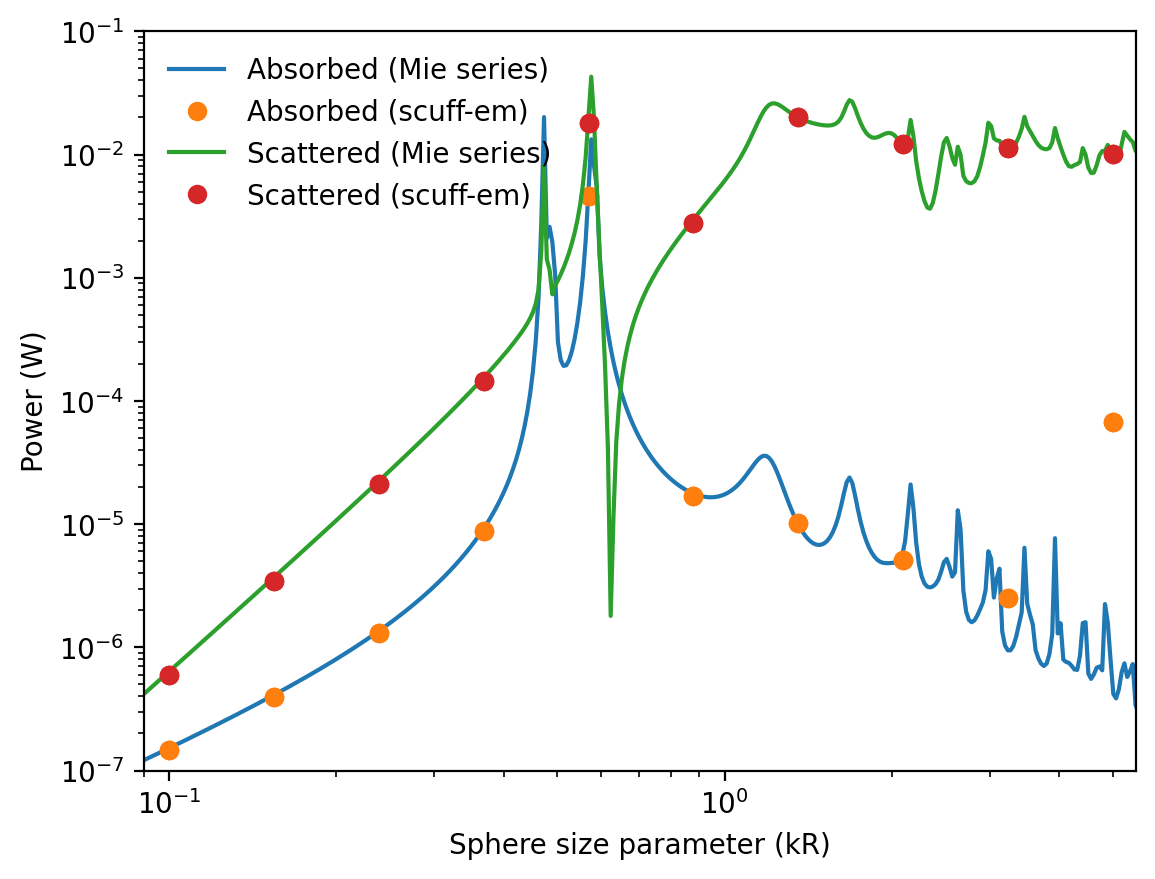

In [15]:
plt.plot(  mie_data[0],cS*mie_data[3],'-',label='Absorbed (Mie series)')
plt.plot(scuff_data[0], scuff_data[1],'o',label='Absorbed (scuff-em)')
plt.plot(  mie_data[0],cS*mie_data[4],'-',label='Scattered (Mie series)')
plt.plot(scuff_data[0], scuff_data[2],'o',label='Scattered (scuff-em)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(9e-2,5.5)
plt.ylim(1e-7,0.1)
plt.xlabel('Sphere size parameter (kR)')
plt.ylabel('Power (W)')
plt.legend(loc='upper left',frameon=False,numpoints=1);